In [1]:
%%HTML
<style> code {background-color : pink !important;} </style>

Camera Calibration Pipeline
===

### Run the code in the cell below to extract object points and image points from chessboard test images

In [11]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('/Users/brandoncanniff/Code2020/Self-Driving-Cars/Camera Calibration/CarND-Camera-Calibration/calibration_wide/GO*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (10,8), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [12]:
print(objpoints)

[]


### This block is for testing only, skip to next

[[469.38593 254.49133]]
[[[469.38593 254.49133]]

 [[974.8965  284.87338]]

 [[969.6613  616.97925]]

 [[490.9341  674.7362 ]]]
[[974.8965  284.87338]]


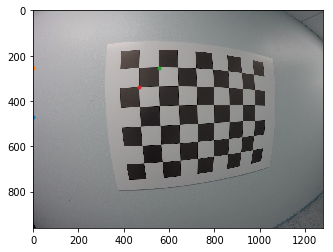

In [9]:
import glob
import matplotlib.pyplot as plt
import cv2
images = glob.glob('/Users/brandoncanniff/Code2020/Self-Driving-Cars/Camera Calibration/CarND-Camera-Calibration/calibration_wide/GO*.jpg')
img2 = cv2.imread(images[1])
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (8,6))
img_corners = cv2.drawChessboardCorners(img, (8,6), corners, ret)
print(corners[0])
src = np.float32([corners[0], corners[7],corners[-1], corners[-8]])
print(src)
print(src[1])
plt.imshow(img2)
plt.plot(corners[0], '.')
plt.plot(corners[1][0][0], corners[1][0][1], '.')
plt.plot(corners[8][0][0], corners[8][0][1], '.')
plt.plot(src[0])


In [10]:
print(objpoints)

[]


### If the first cell ran sucessfully, you should now have objpoints and imgpoints needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

In [13]:
import pickle
import cv2
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('/Users/brandoncanniff/Code2020/Self-Driving-Cars/Camera Calibration/CarND-Camera-Calibration/bridge_shadow.jpg')
print(img.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_size = (gray.shape[1], gray.shape[0])
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None) #<------


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('/Users/brandoncanniff/Code2020/Self-Driving-Cars/Camera Calibration/CarND-Camera-Calibration/test_undist_road1.jpg',dst)

# Save the camera calibration result for later use 
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "/Users/brandoncanniff/Code2020/Self-Driving-Cars/Camera Calibration/CarND-Camera-Calibration/calibration_wide/wide_dist_pickle.p", "wb" ) )
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

(720, 1280, 3)


error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/calib3d/src/calibration.cpp:3681: error: (-215:Assertion failed) nimages > 0 in function 'calibrateCameraRO'
